In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing(use_unicode=True)
from IPython.display import display, Math

In [2]:
q = -50 # W/m^2
Q = 500 # W/m^3
k = 1 # W/mC 

elementos = []

fil = 3
col = 5

for i in range(fil):
    y0 = i*0.02
    y1 = i*0.02+0.02
    for j in range(col):
        x0 = j * 0.02
        x1 = j * 0.02 + 0.02
        c = col + 1
        elementos.append({'x':[x0,x0,x1],
                          'y':[y0,y1,y0],
                          'n':[0+j+i*c,c+j+i*c,1+j+i*c]})

        elementos.append({'x':[x1,x0,x1],
                          'y':[y0,y1,y1],
                          'n':[1+j+i*c,c+j+i*c,c+1+j+i*c]})





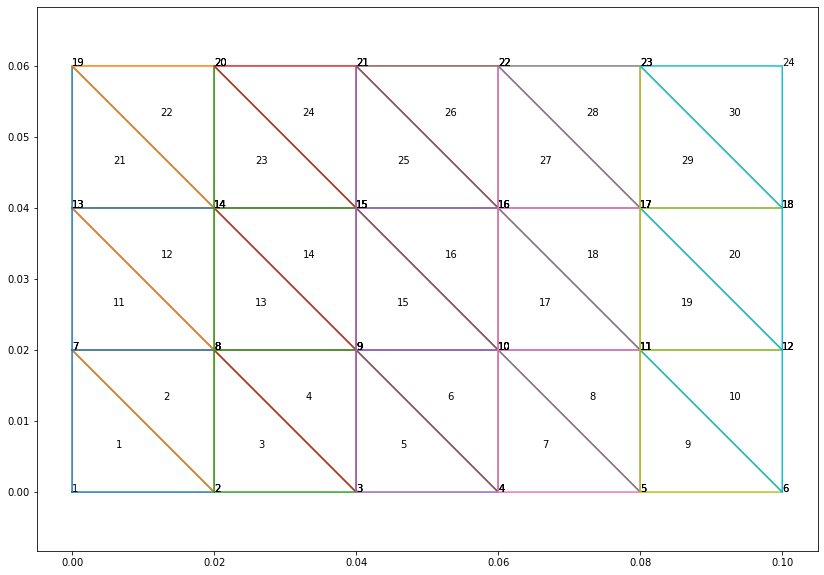

In [3]:
i = 0
n = 0

plt.figure(figsize=(14,10))

for e in elementos:
    plt.plot(e['x']+[e['x'][0]],e['y']+[e['y'][0]])
    x = np.array(e['x']).mean()
    y = np.array(e['y']).mean()
    plt.text(x,y,i+1, ha='center', va='center')
    for x, y, n in zip(e['x'],e['y'],e['n']):
         plt.text(x,y,n+1)
    n = max(n, max(e['n']))
    i = i + 1
    
plt.axis('equal')

plt.show()

In [4]:
for e in elementos:
    A = np.abs(e['x'][0]*(e['y'][1]-e['y'][2])+
               e['x'][1]*(e['y'][2]-e['y'][0])+
               e['x'][2]*(e['y'][0]-e['y'][1]))/2
    e.update(A=A)
    e.update(b1=e['y'][1]-e['y'][2])
    e.update(c1=e['x'][2]-e['x'][1])
    e.update(b2=e['y'][2]-e['y'][0])
    e.update(c2=e['x'][0]-e['x'][2])
    e.update(b3=e['y'][0]-e['y'][1])
    e.update(c3=e['x'][1]-e['x'][0])

In [5]:
for e in elementos:
    K = np.zeros((3,3))
    for i in range(0,3):
        for j in range(0,3):
            K[i,j] = e['b{}'.format(i+1)]*e['b{}'.format(j+1)]+e['c{}'.format(i+1)]*e['c{}'.format(j+1)]
    K = k / 4 / e['A'] * K
    e.update({'K':K})
    F = np.array([1,1,1]) * 1/3 * A * Q
    e.update({'F':F})

In [6]:
# Convección

#H1 = 100 * 0.05 /6 * np.array([[2,1,0],[1,2,0],[0,0,0]])

#e1['K'] = e1['K'] + H1
#e2['K'] = e2['K'] + H1

#F1 = 100 * 400 * 0.05 / 2 * np.array([1,1,0])

#e1['F'] = e1['F'] + F1
#e2['F'] = e2['F'] + F1

In [7]:
# Conducción
F1 = q * 0.05 / 2 * np.array([1,1,0])

#e0['F'] = e0['F'] + F1

In [8]:
for l, e in enumerate(elementos):
    print('Elemento {} - Nodos {}'.format(l+1, np.array(e['n'])+1) )
    display(Math(r'K_{{{}}}='.format(l+1) + sp.latex(sp.Matrix(e['K']).applyfunc(lambda x: sp.Symbol('{:.2f}'.format(x))))))
    display(Math(r'F_{{{}}}='.format(l+1) + sp.latex(sp.Matrix(e['F']).applyfunc(lambda x: sp.Symbol('{:.4f}'.format(x))))))

Elemento 1 - Nodos [1 7 2]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 2 - Nodos [2 7 8]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 3 - Nodos [2 8 3]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 4 - Nodos [3 8 9]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 5 - Nodos [3 9 4]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 6 - Nodos [ 4  9 10]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 7 - Nodos [ 4 10  5]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 8 - Nodos [ 5 10 11]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 9 - Nodos [ 5 11  6]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 10 - Nodos [ 6 11 12]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 11 - Nodos [ 7 13  8]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 12 - Nodos [ 8 13 14]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 13 - Nodos [ 8 14  9]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 14 - Nodos [ 9 14 15]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 15 - Nodos [ 9 15 10]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 16 - Nodos [10 15 16]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 17 - Nodos [10 16 11]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 18 - Nodos [11 16 17]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 19 - Nodos [11 17 12]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 20 - Nodos [12 17 18]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 21 - Nodos [13 19 14]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 22 - Nodos [14 19 20]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 23 - Nodos [14 20 15]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 24 - Nodos [15 20 21]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 25 - Nodos [15 21 16]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 26 - Nodos [16 21 22]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 27 - Nodos [16 22 17]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 28 - Nodos [17 22 23]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 29 - Nodos [17 23 18]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Elemento 30 - Nodos [18 23 24]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
#print(e1['K'])

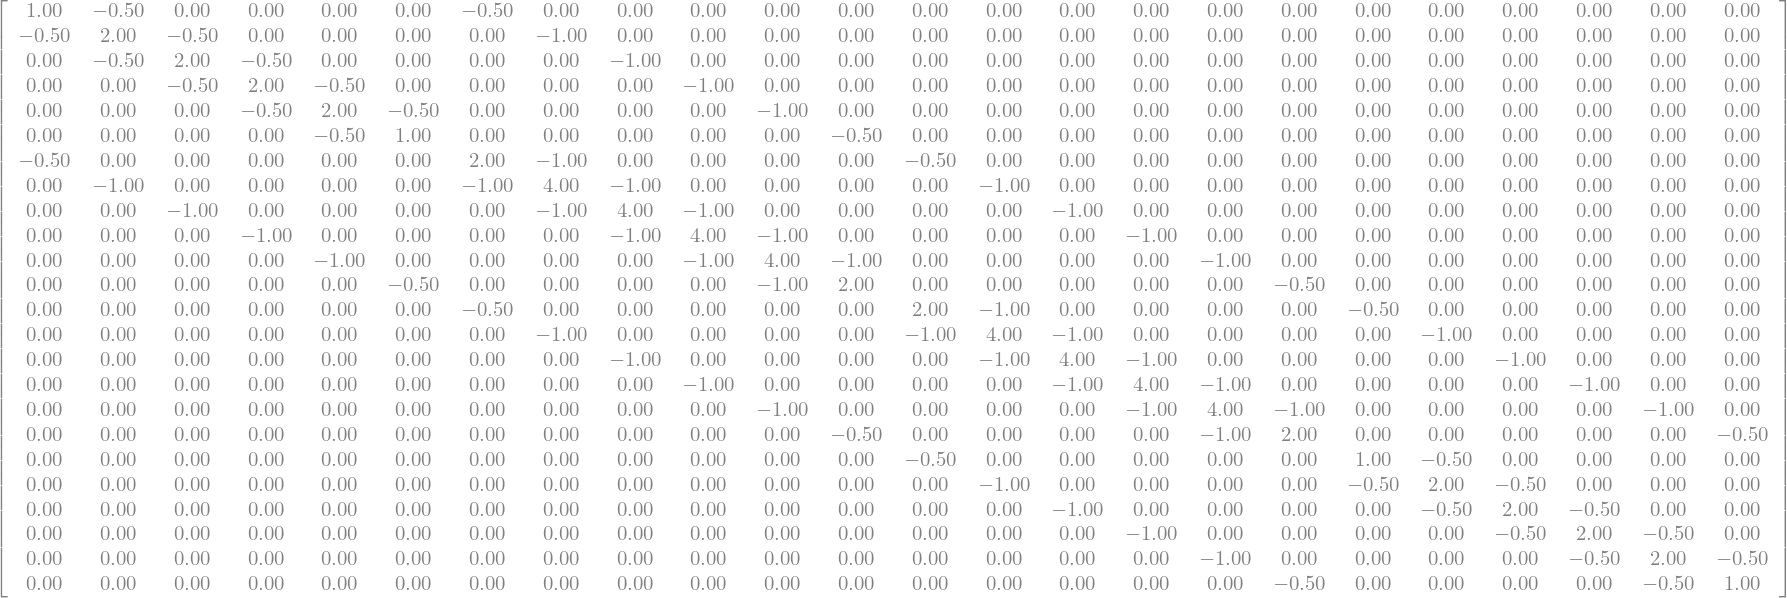

In [10]:
K = np.zeros((n+1,n+1))
F = np.zeros((n+1))

for e in elementos:
    for i, j in enumerate(e['n']):
        for k, m in enumerate(e['n']):
            #print(j,m)
            K[j,m] = K[j,m] + e['K'][i,k]
        F[j] = F[j] + e['F'][i]

sp.Matrix(K).applyfunc(lambda x: sp.Symbol('{:.2f}'.format(x)))

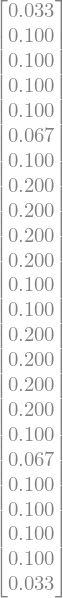

In [11]:
sp.Matrix(F).applyfunc(lambda x: sp.Symbol('{:.3f}'.format(x)))

In [12]:
# La temperatura conocida

Tf = np.array([None] * int(n+1), dtype=np.float)

Tf[5] = 273.15
Tf[11] = 273.15
Tf[17] = 273.15
Tf[23] = 273.15

Tf

array([   nan,    nan,    nan,    nan,    nan, 273.15,    nan,    nan,
          nan,    nan,    nan, 273.15,    nan,    nan,    nan,    nan,
          nan, 273.15,    nan,    nan,    nan,    nan,    nan, 273.15])

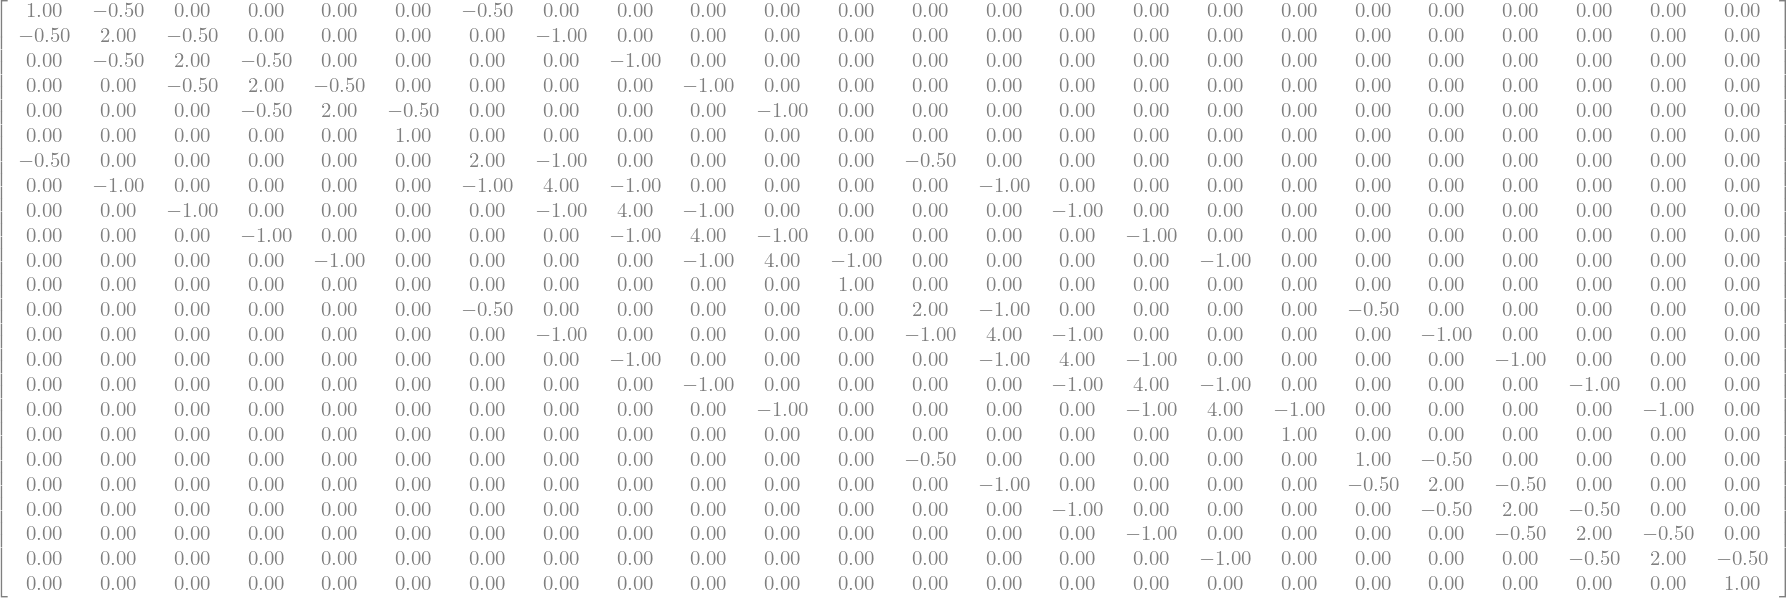

In [13]:
for i, t in enumerate(Tf):
    if not np.isnan(t):
        for j in range(n+1):
            K[i,j] = 0
            if i == j:
                K[i,j] = 1
            F[i] = t
            
sp.Matrix(K).applyfunc(lambda x: sp.Symbol('{:.2f}'.format(x)))

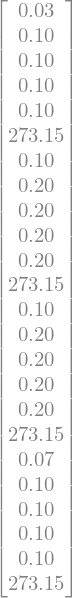

In [14]:
sp.Matrix(F).applyfunc(lambda x: sp.Symbol('{:.2f}'.format(x)))

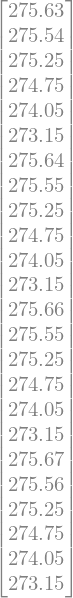

In [15]:
T = np.linalg.solve(K,F)
sp.Matrix(T).applyfunc(lambda x: sp.Symbol('{:.2f}'.format(x)))

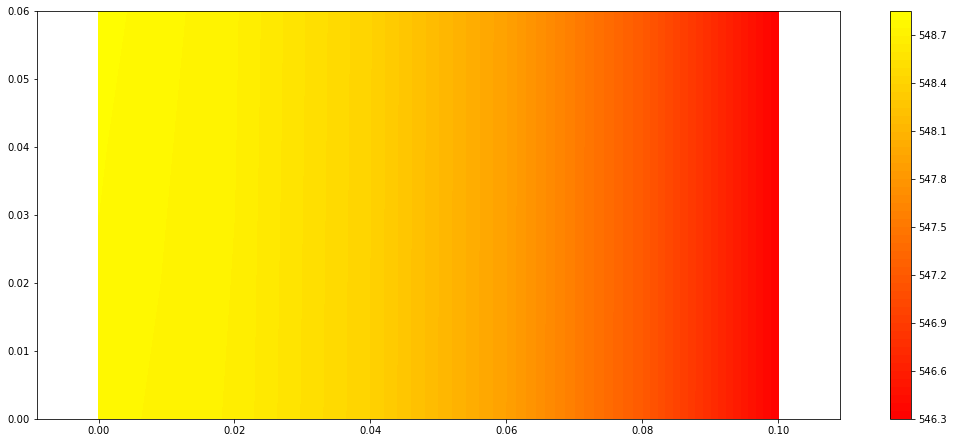

In [16]:
xx = np.array([0.0,0.020,0.040,0.060,0.080,0.10])
yy = np.array([0.0,0.020,0.040,0.060])


xc, yc = np.meshgrid(xx,yy)
plt.figure(figsize=(18,7.5))
cs = plt.contourf(xc,yc,T.reshape(xc.shape)+273.15,cmap=plt.cm.autumn, levels=50)

plt.axis('equal')

plt.colorbar(cs)
plt.show()

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

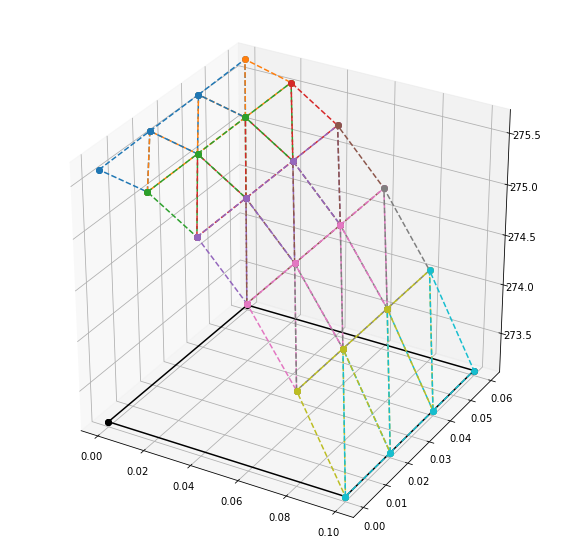

In [24]:
fig=plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
xp = np.array([0,.1,.1,0,0])
yp = np.array([0,0,.06,.06,0])
plt.plot(xp,yp,'ko-',zs=[273.15,273.15,273.15,273.15,273.15] )

for e in elementos:
    xp = e['x'] + [e['x'][0]]
    yp = e['y'] + [e['y'][0]]
    zp = [T[i] for i in e['n']]
    zp = zp + [zp[0]]
    plt.plot(xp,yp,zp, 'o--')